# Tutoriál logistická regrese
## Jan Urban

Nejdříve nainstalujeme a ktivujeme v paměti potřebné knihovny.

In [3]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(caret, e1071, rcompanion) # takto si mohu natahnout nove knihovny

Loading required package: pacman



Nyní natáhneme do paměti data Titanic. Buď z online repozitáře, anebo z lokálního úložiště v počítači.

In [4]:
data <- read.csv("https://osf.io/5fx2k/download") # z online úložiště na OSF.io
#data <- read.csv("~/Google Drive/CUK/uceni/CVUT/cviceni r/Titanic.csv") # z lokálního úložiště (odkomentovat)

Z dat vyhodíme pozorování s chybějícími hodnotami. Následně si prohlédneme desckriptivní statistiky pro data.

In [5]:
data <- na.omit(data)
summary(data)

     Name              PClass               Age            Sex           
 Length:756         Length:756         Min.   : 0.17   Length:756        
 Class :character   Class :character   1st Qu.:21.00   Class :character  
 Mode  :character   Mode  :character   Median :28.00   Mode  :character  
                                       Mean   :30.40                     
                                       3rd Qu.:39.00                     
                                       Max.   :71.00                     
    Survived    
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 Mean   :0.414  
 3rd Qu.:1.000  
 Max.   :1.000  

Upravíme názvy proměnných (jen malá písmena).

In [6]:
colnames(data)
colnames(data) <- tolower(colnames(data))

[1] "Name"     "PClass"   "Age"      "Sex"      "Survived"

Nyní se podíváme, jaké hodnoty mají proměnné, které nás zajímají.

In [7]:
table(data$age)
table(data$pclass)


0.17 0.33  0.8 0.83 0.92    1  1.5    2    3    4    5    6    7    8    9   10 
   1    1    1    2    1    5    2    7    6    7    3    5    1    4    7    2 
  11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26 
   3    2    4    4    5   10   13   30   23   23   31   35   23   27   23   27 
  27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42 
  24   24   15   31   14   22   14   12   14   29    7   11   14   13    8   11 
  43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58 
   7    8   20    8    9   12   10   11    4    6    3    7    6    4    4    6 
  59   60   61   62   63   64   65   67   69   70   71 
   3    5    3    2    3    6    2    1    1    1    3 


1st 2nd 3rd 
226 212 318 

Z proměnné bychom chtěli udělat faktor (tj. kategorie, ne hodnoty).

In [8]:
data$pclass <- as.factor (data$pclass)

Odhadneme logistický model a podíváme se na odhad.

In [9]:
model1 <- glm(survived ~ age + pclass, data = data, family = "binomial")
model1

summary(model1)


Call:  glm(formula = survived ~ age + pclass, family = "binomial", data = data)

Coefficients:
(Intercept)          age    pclass2nd    pclass3rd  
     2.0337      -0.0385      -1.1458      -2.2315  

Degrees of Freedom: 755 Total (i.e. Null);  752 Residual
Null Deviance:	    1026 
Residual Deviance: 909.9 	AIC: 917.9


Call:
glm(formula = survived ~ age + pclass, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0440  -0.9426  -0.6551   1.0959   2.3210  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.033706   0.306880   6.627 3.43e-11 ***
age         -0.038504   0.006546  -5.882 4.05e-09 ***
pclass2nd   -1.145820   0.220260  -5.202 1.97e-07 ***
pclass3rd   -2.231504   0.228993  -9.745  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1025.57  on 755  degrees of freedom
Residual deviance:  909.92  on 752  degrees of freedom
AIC: 917.92

Number of Fisher Scoring iterations: 4


Uložíme odhadnutý model.

In [10]:
summary.model1 <- summary(model1)

Podíváme se na atrubuty odhadnutého modelu.

In [11]:
attributes(summary.model1)

$names
 [1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"    

$class
[1] "summary.glm"

Můžeme si z výstupu odhadu vybrat pouze jeho část, v tomto případě odhadnuté beta koeficienty (regresní váhy).

In [12]:
summary.model1$coefficients [,1]

(Intercept)         age   pclass2nd   pclass3rd 
 2.03370550 -0.03850409 -1.14582018 -2.23150423

Exponováním regresních vah získáme podíly šancí (OR, odds-ratio), které můžeme intuitivně interpretovat jako informaci o velikosti efektu.

In [13]:
betas <- summary.model1$coefficients [,1]
exp (betas)

(Intercept)         age   pclass2nd   pclass3rd 
  7.6423527   0.9622278   0.3179630   0.1073668

## Domácí úkol (individuálně) 
Přidejte do modelu pohlaví. Interpretujte výsledky.

In [14]:
model2 <- glm(survived ~ age + pclass + sex, data = data, family = "binomial")
summary(model2)


Call:
glm(formula = survived ~ age + pclass + sex, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7226  -0.7065  -0.3917   0.6495   2.5289  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.759662   0.397567   9.457  < 2e-16 ***
age         -0.039177   0.007616  -5.144 2.69e-07 ***
pclass2nd   -1.291962   0.260076  -4.968 6.78e-07 ***
pclass3rd   -2.521419   0.276657  -9.114  < 2e-16 ***
sexmale     -2.631357   0.201505 -13.058  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1025.57  on 755  degrees of freedom
Residual deviance:  695.14  on 751  degrees of freedom
AIC: 705.14

Number of Fisher Scoring iterations: 5


Exponujeme logistický regresní koeficient, abychom dostali (hrubou aproximaxi) odds-ratio:

In [15]:
exp(-2.631357)

[1] 0.07198072

To zmamená, že muži mají skoro 14x menší šanci (ne pravděpodobnost!) na přežití, než ženy.

Toto je aproximace OR za situace, kdy jsou hodnoty všech ostatních proměnných v modelu 0: https://stats.stackexchange.com/questions/35013/exponentiated-logistic-regression-coefficient-different-than-odds-ratio

V našem případě to znamená, že je to pro případ věk  = 0 a třída = 1 a konstanta = 0.

Přesnější odhad (18 let, 2 třída):

In [16]:
odds1 = exp(3.759662 - 0.039177*18 -1.291962 * 1 - 2.631357*1)
odds2 = exp(3.759662 - 0.039177*18 -1.291962 * 1)
OR = odds1/odds2
OR

[1] 0.07198072

Nyní predikce pravděpodobnosti přežití mužu a žen:

In [17]:
prob1 <- odds1 / (1 + odds1)
prob2 <- odds2 / (1 + odds2)
prob1
prob2

[1] 0.2954951

[1] 0.8535242

Vidíme, že rozdíly mezi ženami a muži z hlediska pravděpodobnosti přežití nejsou opticky tak velké, jako při porovnání šancí.

Ale snadno můžeme ukázat, že podíl šancí (OR) bude přibližně stejný, jako jsme odhadli výše:

In [18]:
0.29/0.71
0.85/0.15

[1] 0.4084507

[1] 5.666667

A nyní opět podíl šancí:

In [19]:
5.66666666666667/0.408450704225352

[1] 13.87356

Opět vidíme, že muži mají témměř 14x menší šanci na přežití, než ženy.

Nyní si nakreslíme vizualizaci predikované pravděpodobnosti pro muže a ženy v různém věku.

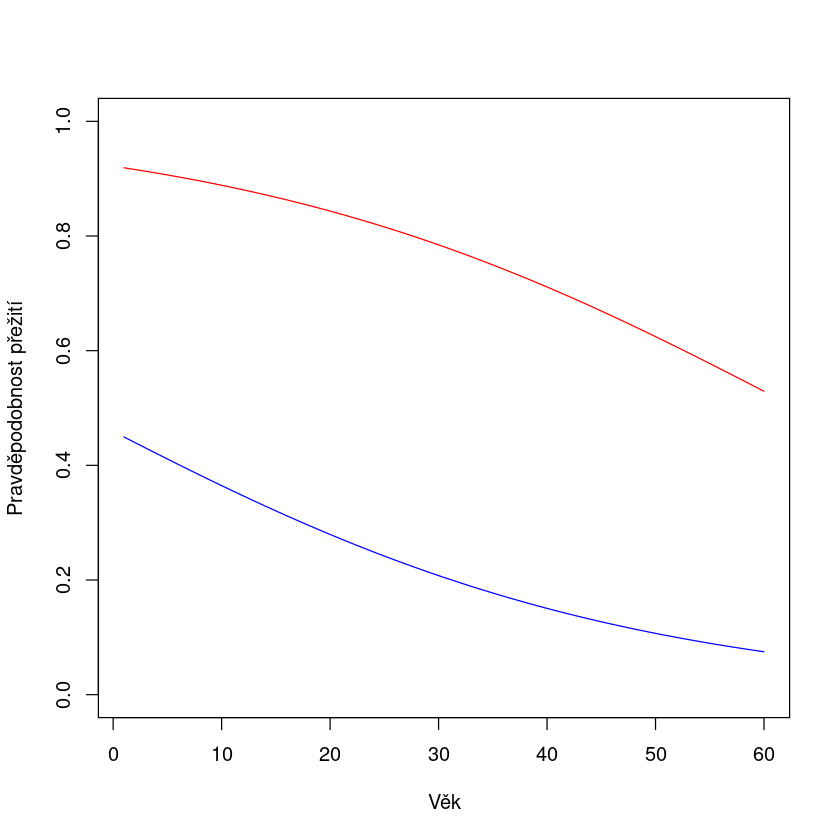

In [20]:
odds3 = exp(3.759662 - 0.039177*c(1:60) -1.291962 * 1 - 2.631357)
prob3 <- odds3 / (1 + odds3)

odds4 = exp(3.759662 - 0.039177*c(1:60) -1.291962 * 1)
prob4 <- odds4 / (1 + odds4)

plot (c(1:60),prob3,  ylab = "Pravděpodobnost přežití", xlab = "Věk", type = "l", ylim = c(0,1), col = "blue")
lines(c(1:60),prob4, col = "red")


# Kvalita modelu.
Jak dobře náš model predikuje přežití?

Různé míry pseudo R-square nedávají intuitivní odpověď.

In [21]:
nagelkerke(model1)

$Models
                                                     
Model: "glm, survived ~ age + pclass, binomial, data"
Null:  "glm, survived ~ 1, binomial, data"           

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.112772
Cox and Snell (ML)                   0.141856
Nagelkerke (Cragg and Uhler)         0.191063

$Likelihood.ratio.test
 Df.diff LogLik.diff  Chisq   p.value
      -3     -57.828 115.66 6.651e-25

$Number.of.observations
          
Model: 756
Null:  756

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

## Hodnocení modelu založená na porovnání predikovaných a pozorovaných hodnot.

Můžeme si nechat modelem predikovat pravděpodobnost, že lidé přežijí.
Pro kontrolu se podívejme na distribuci hustoty pravděpodobnosti přežití. Vidíme, že model u většiny predikuje menší pravděpdobnost než O.5. 

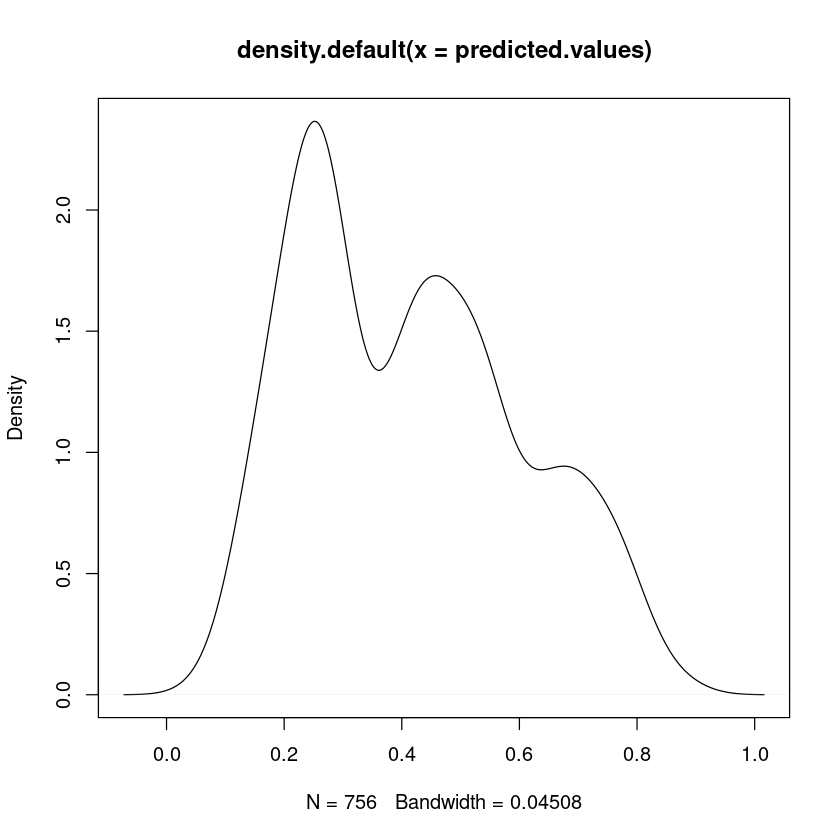

In [22]:
predicted.values <- predict(model1, data, type = "response") # predikce pravděpodobnosti
plot(density(predicted.values))

Vytvoříme novou proměnnou, která bude obsahovat naši predikci přežití. Jako práh přežití stanovíme p = 0.5. Pokud bychom tento práh měnili, tak budeme měnit hodnoty specificity a sensitivity. Na tom je založena ROC curve, která umožňuje optimalizovat predikční model pro specifický účel. 

In [23]:
data$survived_pred <- as.numeric (predicted.values > 0.5)

Nyní se podíváme, jak je dobrá naše predikce. Podíváme se na tzv. confusion matrix.

In [24]:
prop.table( table(actual = data$survived, predicted = data$survived_pred))
# true positive = 20.9% 
# true negative = 46.3% 
# false negative = 20.5%
# false positive = 12.3%


      predicted
actual         0         1
     0 0.4629630 0.1230159
     1 0.2050265 0.2089947

Sensitivita = TP / (TP + FN) = 20.9/(20.5+20.9) = 50.4% # true positive rate; kolik pos. správně klasifikuje

Specificita = TN / (TN + FP) = 46.3/(46.3+12.3) = 79.0% # true negative rate; kolik neg. správně klasifikuje

In [25]:
# odhad specificity a sensitivity s funkcemi z knihovny "caret"
conf_matrix <- caret::confusionMatrix (data = as.factor(data$survived_pred), 
                                       reference = as.factor(data$survived), positive = "1")
# POZOR, JE TREBA DEFINOVAT HODNOTU 1 JAKO POZITIVNI, JINAK SE AUTOMATICKY KODUJE PRVNI HODNOTA FAKTORU (U NAS 0) JAKO POZITIVNI 
# HODNOTA; VE VYSLEDKU BY NAM TO PROHODILO SPECIFICITU A SENSITIVITU
conf_matrix # stejny vysledek pro specificitu a sensitivitu jako vyse
# cteni o sensitivite a specificite a ROC curve
# https://statinfer.com/203-4-2-calculating-sensitivity-and-specificity-in-r/
# https://medium.com/@yuangupitt/confusion-matrix-and-roc-auc-1ab8f456a109

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 350 155
         1  93 158
                                          
               Accuracy : 0.672           
                 95% CI : (0.6372, 0.7054)
    No Information Rate : 0.586           
    P-Value [Acc > NIR] : 7.105e-07       
                                          
                  Kappa : 0.3037          
                                          
 Mcnemar's Test P-Value : 0.0001073       
                                          
            Sensitivity : 0.5048          
            Specificity : 0.7901          
         Pos Pred Value : 0.6295          
         Neg Pred Value : 0.6931          
             Prevalence : 0.4140          
         Detection Rate : 0.2090          
   Detection Prevalence : 0.3320          
      Balanced Accuracy : 0.6474          
                                          
       'Positive' Class : 1               
                              

## Domácí úkol:
Tento úkol zadávám pozdě + někteří jste říkali, že je to pro vás těžké, takže úkol je nepovinný. Pokud můžete, zkuste mu věnovat chvíli času. Na začátku přednášky se na úkol podíváme a zkusíme odstranit problémy, které jste při řešení úkolu měli.

1. Jak se zlepší kvalita modelu, když do něj zahrneme pohlaví?
2. Vizualizujte pravděpodobnost pro různě staré ženy v 1., 2. a 3. třídě (na základě predikce modelu).

In [31]:
predicted.values2 <- predict(model2, data, type = "response") # predikce pravděpodobnosti
data$survived_pred2 <- as.numeric (predicted.values2 > 0.5)
conf_matrix <- caret::confusionMatrix (data = as.factor(data$survived_pred2), 
                                       reference = as.factor(data$survived), positive = "1")

conf_matrix 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 372  91
         1  71 222
                                          
               Accuracy : 0.7857          
                 95% CI : (0.7547, 0.8145)
    No Information Rate : 0.586           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5542          
                                          
 Mcnemar's Test P-Value : 0.1355          
                                          
            Sensitivity : 0.7093          
            Specificity : 0.8397          
         Pos Pred Value : 0.7577          
         Neg Pred Value : 0.8035          
             Prevalence : 0.4140          
         Detection Rate : 0.2937          
   Detection Prevalence : 0.3876          
      Balanced Accuracy : 0.7745          
                                          
       'Positive' Class : 1               
                              

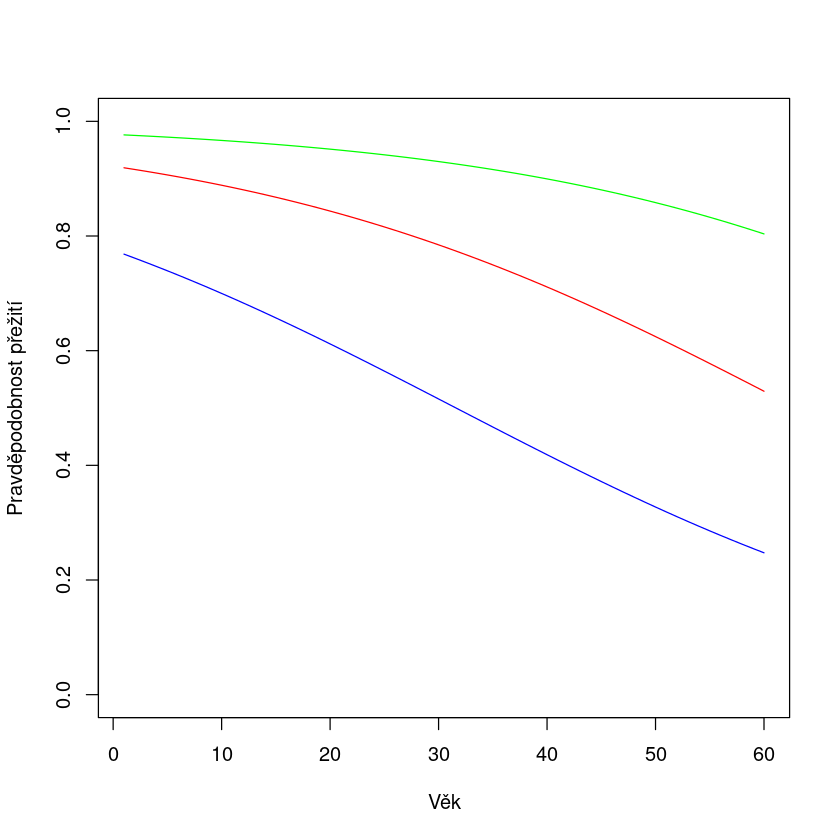

In [34]:
#             Estimate Std. Error z value Pr(>|z|)    
#(Intercept)  3.759662   0.397567   9.457  < 2e-16 ***
#age         -0.039177   0.007616  -5.144 2.69e-07 ***
#pclass2nd   -1.291962   0.260076  -4.968 6.78e-07 ***
#pclass3rd   -2.521419   0.276657  -9.114  < 2e-16 ***
#sexmale     -2.631357   0.201505 -13.058  < 2e-16 ***

odds_zena1 = exp(3.759662 - 0.039177*c(1:60))
odds_zena2 = exp(3.759662 - 0.039177*c(1:60) -1.291962 * 1)
odds_zena3 = exp(3.759662 - 0.039177*c(1:60) -2.521419 * 1)
prob_zena1 <- odds_zena1 / (1 + odds_zena1)
prob_zena2 <- odds_zena2 / (1 + odds_zena2)
prob_zena3 <- odds_zena3 / (1 + odds_zena3)

plot (c(1:60),prob_zena1,  ylab = "Pravděpodobnost přežití", xlab = "Věk", type = "l", ylim = c(0,1), col = "green")
lines(c(1:60),prob_zena2, col = "red")
lines(c(1:60),prob_zena3, col = "blue")